In [169]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [170]:
X = torch.tensor([i for i in range(-50, 50)]).float()

In [171]:
def randvec(r1, r2, shape):
    return (r1 - r2) * torch.rand(shape) + r2

In [174]:
#y = randvec(-1e5, 1e5, X.shape) - (1/2) * X + 3 * X.pow(2) - (6/4) * X.pow(3)
y = randvec(-1e4, 1e4, X.shape) + X + X.pow(2) + X.pow(3)

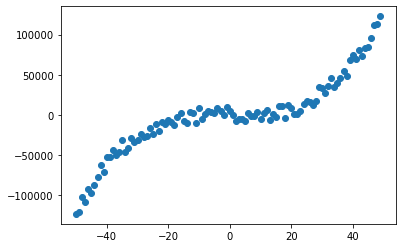

In [175]:
plt.scatter(X, y)

In [176]:
def mse(y_true, y_pred):
    e = y_true - y_pred
    return e.T.mm(e) / y_true.shape[0]

In [195]:
def create_features(X, degree=2):
    if len(X.shape) == 1:
        X = X.unsqueeze(1)
    ones_col = torch.ones((X.shape[0], 1), dtype=torch.float32)
    X_d = torch.cat([ones_col, X], axis=1)
    for i in range(1, degree):
        X_pow = X.pow(i + 1)
        #X_d -= X_d.mean()
        #std = X_d.std()
        #if std != 0:
        #    X_d /= std
        X_d = torch.cat([X_d, X_pow], axis=1)
    return X_d

In [196]:
features = create_features(X, degree=3)

In [198]:
def get_weights_col(X):
    return torch.ones(X.shape[1], 1)

In [199]:
def predict(features, weights):
    pred = 0
    for i in range(len(features)):
        pred += features[i].mm(weights[i])
    return pred

In [200]:
y_true = y.unsqueeze(1)

In [205]:
def normal_equation(y_true, features):
    XTX_inv = (X.T.mm(X)).pinverse()
    XTy = X.T.mm(y_true)
    weights = XTX_inv.mm(XTy)
    return weights

In [210]:
features.T.mm(features).pinverse()

tensor([[ 2.3767e-02,  4.2216e-03, -1.7546e-05, -2.3736e-06],
        [ 2.3770e-05,  7.9232e-05, -4.7566e-08, -4.4393e-08],
        [-1.5873e-05, -2.8614e-06,  1.9758e-08,  1.6199e-09],
        [-2.2199e-08, -4.5965e-08,  4.4421e-11,  3.0246e-11]])

In [206]:
weights = normal_equation(y_true, features)

IndexError: Dimension out of range (expected to be in range of [-1, 0], but got 1)

In [184]:
y_pred = predict(features, weights)

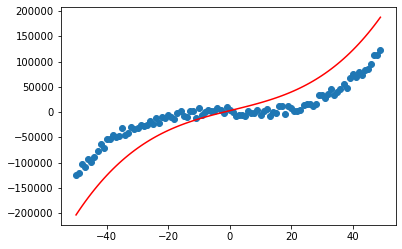

In [185]:
plt.scatter(X,y)
plt.plot(X, y_pred, c='red')